<a href="https://colab.research.google.com/github/bluebird702/study/blob/main/langchain_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

이 문서는 langchain study를 하면서 정리한 노트입니다.

# 실습 준비
colab에서 예제를 실행할 것이므로 Google AI Studio에 계정을 등록하고 Key를 얻는다. 자세한 내용은 다음 문서를 참고한다.

[Gemini Key 발급받아오기](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb#scrollTo=gHYFrFPjSGNq)





## 환경 테스트
다음과 같이 테스트해보자. 공식 문서에 있는 내용을 그대로 테스트해본다.

[문서 링크](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/python_quickstart.ipynb#scrollTo=FFPBKLapSCkM)

In [ ]:
# google python sdk 설치
!pip install -q -U google-generativeai

In [ ]:
# 왼쪽의 열쇠 버튼에 GOOGLE_API_KEY를 등록한다음에 다음 코드를 돌려서 라이브러리를 초기화
from google.colab import userdata
import google.generativeai as genai

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    display(m.name) # colab에서는 print 말고 display를 써야 wrapping된 결과를 얻을 수 있다.


'models/gemini-1.0-pro'

'models/gemini-1.0-pro-001'

'models/gemini-1.0-pro-latest'

'models/gemini-1.0-pro-vision-latest'

'models/gemini-1.5-flash'

'models/gemini-1.5-flash-001'

'models/gemini-1.5-flash-latest'

'models/gemini-1.5-pro'

'models/gemini-1.5-pro-001'

'models/gemini-1.5-pro-latest'

'models/gemini-pro'

'models/gemini-pro-vision'

In [ ]:
# 다음의 코드를 테스트해보자
import pathlib
import textwrap

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
# gemini-pro를 일단 사용해본다.
model = genai.GenerativeModel('gemini-pro')

In [ ]:
# %%time은 맨 첫줄에서만 동작함. 그래서 코드셀을 나눴음.
%%time
response = model.generate_content("삶의 의미가 멀까?")
to_markdown(response.text)

CPU times: user 162 ms, sys: 23.4 ms, total: 185 ms
Wall time: 10.5 s


> 삶의 의미는 주관적인 것이며, 사람마다 다를 수 있습니다. 일부 사람들에게는 삶의 의미가 명확하고 명확한 반면, 다른 사람들에게는 더 모호하고 찾기 어려울 수 있습니다.
> 
> 어떤 사람들은 삶의 의미가 다음과 같다고 믿습니다.
> 
> * 사랑하는 사람과 의사 소통하고 관계를 맺는 것
> * 목적 의식을 가지고 열정을 추구하는 것
> * 세상에 긍정적인 영향을 미치는 것
> * 자기 성장과 성취를 추구하는 것
> 
> 다른 사람들은 삶의 의미가 단순히 존재하고 경험을 누리는 것일 뿐이라고 믿을 수 있습니다. 또 다른 사람들은 삶의 의미가 신이나 우주적 목적과 같은 초월적인 것과 연결될 수 있다고 믿을 수 있습니다.
> 
> 어떤 사람들은 삶의 의미가 시간이 지남에 따라 변할 수 있다고 믿는 반면, 다른 사람들은 그 의미가 고정되어 있다고 믿을 수 있습니다. 궁극적으로 삶의 의미는 각 개인이 결정해야 하는 것입니다.
> 
> 삶의 의미를 찾는 것은 어려울 수 있지만 가치 있는 노력이 될 수 있습니다. 삶의 의미를 찾으면 인생의 목적 의식이 높아지고 만족도와 행복도가 높아질 수 있습니다.
> 
> 삶의 의미를 찾는 데 도움이 될 수 있는 몇 가지 제안은 다음과 같습니다.
> 
> * 자신의 가치관, 신념, 관심사를 반성하는 시간을 갖는 것
> * 열정을 따르고 삶에 기쁨을 주는 활동에 참여하는 것
> * 여행, 새로운 사람들 만나기, 새로운 문화 탐험과 같은 새로운 경험에 자신을 열어주는 것
> * 지역사회에 참여하고 다른 사람들을 돕는 것
> * 영적 실천 또는 명상을 통해 초월적인 것과 연결하는 것
> 
> 삶의 의미를 찾는 것은 쉬운 과제가 아닐 수 있지만 여정은 그 자체로 가치가 있습니다. 인내심을 갖고 스스로에게 친절하게 대하고 자신의 길에 자신만의 시간을 주십시오.

In [ ]:
# Stream으로 노출하려면 출력을 다르게 해야한다.
%%time
response = model.generate_content("삶의 의미가 멀까?", stream=True)
for chunk in response:
  display(chunk.text)
  display("_"*80)

'삶의 의미는 사람마다 다르며, 그에 대해서는 보'

'________________________________________________________________________________'

'편적으로 받아들여지는 답이 없습니다. 그러나 사람들이 삶의 의미에 대해 갖는 몇 가지 일반적인 관점'

'________________________________________________________________________________'

'은 다음과 같습니다.\n\n**목적론적 관점:**\n* 인간의 삶은 본질적으로 목적이 있으며, 이는 종교적 신념, 도덕적 가치, 또는 개인적 성취를 통해 발견될 수 있습니다.\n* 이 관점'

'________________________________________________________________________________'

'에서는 삶의 의미는 자신의 목적을 찾고 그것을 성취하는 것입니다.\n\n**실존주의적 관점:**\n* 인간은 본질적으로 자유롭고 책임이 있습니다.\n* 이 관점에서는 삶의 의미는 자신의 선택과 행동을 통해 스스로 만들어내는 것입니다.\n\n**인본주의적 관점:**\n* 인간의 잠재력과 개인적 성장을 강조합니다.\n* 이 관점에서는 삶의 의미는 자신의 능력을 최대한 발휘하고 다른 사람과 유익한'

'________________________________________________________________________________'

' 관계를 맺는 것입니다.\n\n**결정주의적 관점:**\n* 모든 사건은 운명이나 자연 법칙에 의해 결정되며, 인간은 자신의 삶에 통제력이 없습니다.\n* 이 관점에서는 삶의 의미는 자신의 존재를 받아들이고 현재를 즐기는 것입니다.\n\n**무의미함의 수용:**\n* 인간의 삶은 본질적으로 무의미하며, 의미를 부여하는 것은 우리 자신의 해석에 달려 있습니다.\n* 이 관점에서는 삶의 의미를 찾는 것보다 삶을 자체적으로 받아들이는 것에 중점을 둡니다.\n\n**개인적 관점:**\n* 삶의 의미는 주관적이며 개인마다 다릅니다.\n* 이러한 관점에서는 삶의 의미를 스스로 정의하고 자신의 가치관과 신념에 따라 살아가는 것이 중요합니다.\n\n궁극적으로 삶의 의미는 개인이 자신에게 중요한 것에 따라 결정됩니다. 삶의 목적을 찾는 것은 지속적이고 개인적인 여정이며'

'________________________________________________________________________________'

', 올바른 대답이나 잘못된 대답은 없습니다.'

'________________________________________________________________________________'

CPU times: user 210 ms, sys: 35.7 ms, total: 246 ms
Wall time: 11.6 s


예제가 openai로 되어있습니다. colab에서 테스트를 쉽게 하고 싶으니 gemini로 바꿔서 테스트해보자.

일단 langchain library를 설치한다.

In [ ]:
# LangChain 업데이트
!pip install -U langchain langchain-community langchain-experimental langchain-core langchain-google-genai langsmith

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.5/973.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.5/199.5 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.5/308.5 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.8/122.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


기본 코드 돌려봅시다!

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

# 객체 생성
llm = ChatGoogleGenerativeAI(
    model="gemini-pro",
    google_api_key=GOOGLE_API_KEY
)

# 물어보자.
result = llm.invoke("넌 누구냐!")
display(f"[답변]: {result.content}")

'[답변]: 저는 Gemini입니다. Google에서 개발한 대규모 다국어 모델입니다.'

요정도에서 gemini설정을 마치고 langchain 학습으로 넘어간다.

langchain학습은 [테디노트님의 ebook](https://wikidocs.net/book/14314)으로 진행해본다.

# Ch01 LangChain 시작하기 노트


프롬프트 템플릿도 한번 써보자.

일단 prompt를 만든다.

In [ ]:
from langchain.prompts import PromptTemplate

template = "{country}의 수도는 뭐야?"

# 템플릿 완성
prompt = PromptTemplate.from_template(template=template)
prompt

PromptTemplate(input_variables=['country'], template='{country}의 수도는 뭐야?')

그 다음에 prompt를 써서 요청을 날려보자

In [ ]:
from langchain.chains import LLMChain

llm_chain = LLMChain(prompt=prompt, llm=llm) # 위에서 prompt와 llm을 만드는 코드를 실행한 후에 여기를 돌려야 한다.

llm_chain.invoke({"country": "대한민국"}) # 요거는 서울

{'country': '대한민국', 'text': '서울'}

apply()로 여러개의 입력도 한번에 처리가 가능하다.

In [ ]:
input_list = [{"country": "호주"}, {"country": "중국"}, {"country":"네덜란드"}]

result = llm_chain.apply(input_list)

display(result)

for res in result:
  display(res["text"].strip())

[{'text': '캔버라'}, {'text': '베이징'}, {'text': '암스테르담'}]

'캔버라'

'베이징'

'암스테르담'

generate()로 좀 더 자세한 추가정보를 출력할 수 있다.

In [ ]:
input_list = [{"country": "호주"}, {"country": "중국"}, {"country":"네덜란드"}]

result = llm_chain.generate(input_list)

display(result)

토큰 사용량을 바로 보려면 다음과 같이 찍으면 된다고 하는데 OpenAI는 되나본데, Gemini는 아무것도 안나온다. 따로 방법을 찾아보자.

In [ ]:
result.llm_output

{}

2개 이상의 변수를 템플릿 안에 정의하는 것도 가능하다.

In [ ]:
template = "{area1}와 {area2}의 시차는 몇시간이야?"

prompt = PromptTemplate.from_template(template)
prompt

In [ ]:
llm_chain = LLMChain(prompt=prompt, llm=llm)

In [ ]:
display(llm_chain.invoke({"area1": "서울", "area2": "파리"}))

In [ ]:
input_list = [
    {"area1": "파리", "area2": "뉴욕"},
    {"area1": "서울", "area2": "하와이"},
    {"area1": "켄버라", "area2": "베이징"},
]

# 반복문으로 결과 출력
result = llm_chain.apply(input_list)
for res in result:
    display(res["text"].strip())

stream으로 출력도 가능하다만 OpenAI로 좀 다른거 같다. stream이란 함수를 호출해서 출력한다.

In [ ]:
llm = ChatGoogleGenerativeAI(
    model="gemini-pro",
    google_api_key=GOOGLE_API_KEY,
    temperature=0, #창의성
    max_output_tokens=2048,
)

question = "대한민국에 대해서 300자 내외로 최대한 상세히 알려줘"

for chunk in llm.stream(question):
    display(to_markdown(chunk.content))
    display(to_markdown("---"))

Chain 생성에서 LCEL(LangChain Expression Language)도 가능한지 살펴본다.

In [ ]:
from langchain_core.output_parsers import StrOutputParser

# 주어진 나라에 대하여 수도를 묻는 프롬프트 템플릿을 생성합니다.
template = """
당신은 친절하게 답변해 주는 친절 봇입니다. 사용자의 질문에 [FORMAT]에 맞추어 답변해 주세요.
답변은 항상 한글로 작성해 주세요.

질문:
{question}에 대하여 설명해 주세요.

FORMAT:
- 개요:
- 예시:
- 출처:
"""

template = """
당신은 영어를 가르치는 10년차 영어 선생님입니다. 상황에 [FORMAT]에 영어 회화를 작성해 주세요.

상황:
{question}

FORMAT:
- 영어 회화:
- 한글 해석:
"""

prompt = PromptTemplate.from_template(template)

# OpenAI 챗모델을 초기화합니다.
model = ChatGoogleGenerativeAI(
    model="gemini-pro",
    google_api_key=GOOGLE_API_KEY,
    temperature=0, #창의성
    max_output_tokens=2048,
)

# 문자열 출력 파서를 초기화합니다.
output_parser = StrOutputParser()

# 프롬프트, 모델, 출력 파서를 연결하여 처리 체인을 구성합니다.
chain = prompt | model | output_parser

# 완성된 Chain 을 이용하여 country 를 '대한민국'으로 설정하여 실행합니다.
# chain.invoke({"country": "대한민국"})
print(chain.invoke({"question": "저는 식당에 가서 음식을 주문하고 싶어요"}))

ModuleNotFoundError: No module named 'langchain_core'

In [ ]:
print(chain.invoke({"question": "미국에서 피자 주문"}))

ebook에 있는 다른 예제도 실행해본다.

In [ ]:
# prompt 를 PromptTemplate 객체로 생성합니다.
prompt = PromptTemplate.from_template("{topic} 에 대해 쉽게 설명해주세요.")

# input 딕셔너리에 주제를 'ice cream'으로 설정합니다.
input = {"topic": "양자역학"}

# prompt 객체의 invoke 메서드를 사용하여 input을 전달하고 대화형 프롬프트 값을 생성합니다.
prompt.invoke(input)

# prompt 객체와 model 객체를 파이프(|) 연산자로 연결하고 invoke 메서드를 사용하여 input을 전달합니다.
# 이를 통해 AI 모델이 생성한 메시지를 반환합니다.
(prompt | model).invoke(input)

In [ ]:
# parse_output 메서드를 사용하여 AI 모델이 생성한 메시지 문자열로 출력합니다.
display((prompt | model | output_parser).invoke(input))

LCEL 인터페이스에 있는 다른 내용은 필요할 때 보면 될 것 같고, 병렬성 예제를 돌려본다.

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableParallel

# {country} 의 수도를 물어보는 체인을 생성합니다.
chain1 = ChatPromptTemplate.from_template("{country} 의 수도는 어디야?") | model

# {country} 의 면적을 물어보는 체인을 생성합니다.
chain2 = ChatPromptTemplate.from_template("{country} 의 면적은 얼마야?") | model
# 위의 2개 체인을 동시에 생성하는 병렬 실행 체인을 생성합니다.
combined = RunnableParallel(capital=chain1, area=chain2)

In [ ]:
chain1.invoke(
    {"country": "대한민국"}
)

In [ ]:
chain2.invoke({"country": "미국"})

In [ ]:
# 주어진 'country'에 대해 'combined' 객체의 'invoke' 메서드를 호출합니다.
combined.invoke({"country": "대한민국"})

# Ch07 도큐먼트 로더(Document Loader)



## 01. 논문(Arxiv)

Arxiv는 200만편 이상이 있는 학술 논문 오픈 엑세스 아카이브입니다.

먼저 Arxiv 라이브러리를 설치해보자.

ArxivLoader에 대한 설명은 다음 링크를 참조하자

https://pypi.org/project/arxivloader/


In [ ]:
# 1. arxiv 라이브러리를 설치합니다.
!pip install -qU arxiv

# 2. arxiv.org 사이트에서 다운로드한 PDF파일을 텍스트 형식으로 변환하는 PyMuPDF 패키지를 설치합니다.
!pip install -qU pymupdf


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 49.9 MB/s eta 0:00:00


이제 문서를 로딩해봅시다.  

In [ ]:
from langchain_community.document_loaders import ArxivLoader

# ArxivLoader를 사용하여 arXiv에서 문서를 로드합니다.
# query 매개변수는 검색할 논문의 arXiv ID이고, load_max_docs 매개변수는 로드할 최대 문서 수를 지정합니다.
# 그 유명한 Attention Is All You Need 논문 보기
docs = ArxivLoader(query="1706.03762", load_max_docs=2).load()
len(docs)  # 로드된 문서의 개수를 반환합니다.

1

In [ ]:
# metadata 출력해보기
docs[0].metadata

{'Published': '2023-08-02',
 'Title': 'Attention Is All You Need',
 'Authors': 'Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin',
 'Summary': 'The dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks in an encoder-decoder configuration. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer, based\nsolely on attention mechanisms, dispensing with recurrence and convolutions\nentirely. Experiments on two machine translation tasks show these models to be\nsuperior in quality while being more parallelizable and requiring significantly\nless time to train. Our model achieves 28.4 BLEU on the WMT 2014\nEnglish-to-German translation task, improving over the existing best results,\nincluding ensembles by over 2 BLEU. On the WMT 2014 English-to-French\ntranslation task, 

In [ ]:
# 문서의 모든 페이지 내용 중 처음 400자를 가져오기
docs[0].page_content[:400]

'Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.com\nNoam Shazeer∗\nGoogle Brain\nnoam@google.com\nNiki Parmar∗\nGoogle Research\nnikip@google.com\nJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nG'

In [ ]:
# 문서의 글자수 보기
len(docs[0].page_content)

39593

In [ ]:
# 문서의 페이지수 보기
docs[0].page_content

'Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.com\nNoam Shazeer∗\nGoogle Brain\nnoam@google.com\nNiki Parmar∗\nGoogle Research\nnikip@google.com\nJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.com\nAidan N. Gomez∗†\nUniversity of Toronto\naidan@cs.toronto.edu\nŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer,\nbased solely on attention mechanisms, dispensing with recurrence

## 02. 허깅페이스 데이터셋

허깅 페이스 허브는 NLP, 컴퓨터 비전, 오디오 분야 등 다양한 작업에 사용될 수 있는 100개 이상의 언어로된 5000개 이상의 데이터셋을 제공한다.

허깅페이스 데이터셋 로더(HuggingFaceDatasetLoader)를 써봅시다.

요것도 설치해봅시다

In [ ]:
# sentence_transformer, faiss 없으면 에러나서 추가.

!pip install datasets sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 6.7 MB/s eta 0:00:00


이제 로딩해봅시다.

In [ ]:
from langchain_community.document_loaders import HuggingFaceDatasetLoader

dataset_name = "imdb"  # 데이터셋 이름을 "imdb"로 설정합니다.
page_content_column = "text"  # 페이지 내용이 포함된 열의 이름을 "text"로 설정합니다.

# HuggingFaceDatasetLoader를 사용하여 데이터셋을 로드합니다.
# 데이터셋 이름과 페이지 내용 열 이름을 전달합니다.
loader = HuggingFaceDatasetLoader(dataset_name, page_content_column)

data = loader.load()  # 로더를 사용하여 데이터를 불러옵니다

data[:3] # 처음 3개 요소를 봅시다.

/usr/local/lib/python3.10/dist-packages/datasets/load.py:2547: FutureWarning: 'use_auth_token' was deprecated in favor of 'token' in version 2.14.0 and will be removed in 3.0.0.
You can remove this warning by passing 'token=<use_auth_token>' instead.
  warnings.warn(


[Document(page_content='"I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered \\"controversial\\" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes

이 데이터셋을 이용해서 질문에 답변해봅시다.

HuggingFaceDatasetLoader를 사용해서 데이터를 로드하고, VectorstoreIndexCreator를 통해서 벡터 저장소 기반의 인덱스를 생성해봅니다.

In [ ]:
from langchain.indexes import VectorstoreIndexCreator
from langchain_community.document_loaders.hugging_face_dataset import (
    HuggingFaceDatasetLoader,
)
from langchain_google_genai import ChatGoogleGenerativeAI

dataset_name = "tweet_eval"  # 데이터셋 이름을 "tweet_eval"로 설정합니다.
page_content_column = "text"  # 페이지 내용이 포함된 열의 이름을 "text"로 설정합니다.
name = "stance_climate"  # 데이터셋의 특정 부분을 식별하는 이름을 "stance_climate"로 설정합니다.

# HuggingFaceDatasetLoader를 사용하여 데이터셋을 로드합니다.
loader = HuggingFaceDatasetLoader(dataset_name, page_content_column, name)

# 이거 문서에는 없는데 컴파일 안되서 추가합니다.
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS

# 로더에서 벡터 저장소 인덱스를 생성합니다.
index = VectorstoreIndexCreator(
    embedding=HuggingFaceEmbeddings(), # 요것도 바뀌어서 추가해줘야 합니다.
).from_loaders([loader])

query = "What are the most used hashtag?"  # 가장 많이 사용되는 해시태그는 무엇인가요?
result = index.query( # 요거 사용법이 바뀌어서 llm을 꼭 넣어줘야 합니다.
    question=query,
    llm=ChatGoogleGenerativeAI(
      model="gemini-1.5-pro-latest", # gemini-pro로 하면 에러가 나는데 요렇게 바꾸면 됨. https://github.com/google-gemini/generative-ai-python/issues/278#issuecomment-2055815213
      google_api_key=GOOGLE_API_KEY,
      temperature=0, #창의성
      max_output_tokens=204ㄱ8,
    ),
)

result

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain/indexes/vectorstore.py:129: UserWarning: Using InMemoryVectorStore as the default vectorstore.This memory store won't persist data. You should explicitlyspecify a vectorstore when using VectorstoreIndexCreator
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:2547: FutureWarning: 'use_auth_token' was deprecated in favor of 'token' in version 2.14.0 and will be removed in 3.0.0.
You can remove this warning by passing 'token=<use_auth_token>' instead.
  warnings.warn(


'The most used hashtag is #SemST. \n'

## 03. 웹 크롤링

호오..여기는 참으로 관심이 가는 항목.
렛츠고!

필요한 것들 설치해봅시다.

역시나 문서에 있는 걸로는 제대로 동작하지 않는다.
colab이기 때문에 playwright 동작을 하기 위한 방법이 필요하다.

이 [문서](https://jonghoonpark.com/2023/05/26/google-colab%EC%97%90%EC%84%9C-playwright-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0)를 참고하자.

In [ ]:
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!apt install ./google-chrome-stable_current_amd64.deb

!pip install nest_asyncio
!pip install pytest-playwright

!pip install -qU playwright beautifulsoup4 html2text tiktoken

import nest_asyncio
nest_asyncio.apply()

--2024-05-25 15:46:29--  https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
Resolving dl.google.com (dl.google.com)... 172.217.214.91, 172.217.214.93, 172.217.214.190, ...
Connecting to dl.google.com (dl.google.com)|172.217.214.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107624500 (103M) [application/x-debian-package]
Saving to: ‘google-chrome-stable_current_amd64.deb.3’

google-chrome-stabl 100%[===================>] 102.64M   253MB/s    in 0.4s    

2024-05-25 15:46:29 (253 MB/s) - ‘google-chrome-stable_current_amd64.deb.3’ saved [107624500/107624500]

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'google-chrome-stable' instead of './google-chrome-stable_current_amd64.deb'
google-chrome-stable is already the newest version (125.0.6422.112-1).
0 upgraded, 0 newly installed, 0 to remove and 44 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5

이제 되려나..

근데..이건 너무 그대로 파싱하는 것이라..이래저래 귀찮다.

In [ ]:
from langchain_community.document_loaders import AsyncChromiumLoader
from langchain_community.document_transformers import Html2TextTransformer
from langchain_community.document_transformers import BeautifulSoupTransformer


# 크롤링할 URL 목록을 설정합니다.
urls = ["https://n.news.naver.com/article/011/0004345031?cds=news_media_pc"]

# AsyncChromiumLoader를 사용하여 URL에서 비동기적으로 문서를 로드합니다.
loader = AsyncChromiumLoader(urls)
# 로드된 문서를 가져옵니다.
docs = loader.load()

# 0번 문서의 내용 중 중간의 500자를 출력합니다.
docs[0].page_content[6000:6500]

# html2text = Html2TextTransformer()  # HTML을 텍스트로 변환하는 객체를 생성합니다.
# docs_transformed = html2text.transform_documents(
#     docs
# )  # HTML 문서를 텍스트로 변환합니다.
# print(docs_transformed[0].page_content)

# # 변환 작업
bs_transformer = BeautifulSoupTransformer()
# HTML 문서를 변환합니다. p, li, div, a 태그의 내용을 추출합니다.
docs_transformed = bs_transformer.transform_documents(
    docs,
    # tags_to_extract=["p", "li", "div", "a"]
    tags_to_extract=["div"],
)

본문 바로가기

이전 페이지

#  서울경제

구독

**언론사를 구독하면 메인** 에서 바로 볼 수 있어요!

메인 뉴스판에서 서울경제 주요뉴스를  
볼 수 있습니다. 보러가기

**서울경제** 언론사 구독 해지되었습니다.

  * 주요뉴스
  * 숏폼
  * 정치
  * 경제
  * 사회
  * 생활
  * 세계
  * IT
  * 사설/칼럼
  * 신문보기
  * 랭킹

* * *

_PICK_ _안내_

언론사가 주요기사로  
선정한 기사입니다. 언론사별 바로가기 닫기

## 대통령실 "연금개혁, 쫓기듯 타결 안돼…청년세대 의견 반영해야"

_입력_ 2024.05.25. 오후 6:37

기사원문

_박동휘 기자_

  * _박동휘 기자_

구독 구독중

구독자

    0

응원수

    0

더보기

추천

  * 쏠쏠정보 0
  * 흥미진진 0
  * 공감백배 0
  * 분석탁월 0
  * 후속강추 0

댓글

본문 요약봇

**본문 요약봇도움말** 자동 추출 기술로 요약된 내용입니다. 요약 기술의 특성상 본문의 주요 내용이 제외될 수 있어, 전체 맥락을 이해하기
위해서는 기사 본문 전체보기를 권장합니다. 닫기

텍스트 음성 변환 서비스 사용하기

_성별_ 남성 여성

_말하기 속도_ 느림 보통 빠름

이동 통신망을 이용하여 음성을 재생하면 별도의 데이터 통화료가 부과될 수 있습니다.

본문듣기 시작

닫기

글자 크기 변경하기

  * 가 _1단계_ 작게
  * 가 _2단계_ 보통
  * 가 _3단계_ 크게
  * 가 _4단계_ 아주크게
  * 가 _5단계_ 최대크게

SNS 보내기

인쇄하기

_연합뉴스_  
[서울경제]  
  
대통령실은 25일 이재명 더불어민주당 대표가 기자회견을 열어 국민연금 개혁안을 21대 국회에서 처리하자고 윤석열 대통령과 국민의힘에 거듭
요구한 데 대해 시간에 쫓기듯 졸속으로 결정해서는 안 된다고 밝혔다.  
  
대통령실 고위 관계자는 이날 "보험료율과 소득대체율 수치에 대한 결정 자체도 중요하지만, 국민연금은 국

WebBaseLoader는 HTML 웹페이지의 모든 텍스트를 추출할 때 사용하는 로더임.

WebBaseLoader의 경우 다양한 자식 클래스들이 있어서 이걸 쓰면 알아서 파싱을 잘 해주는 듯함.

In [ ]:
from langchain_community.document_loaders import WebBaseLoader

# 웹 페이지 "https://news.naver.com/"에서 데이터를 로드하는 WebBaseLoader 객체를 생성합니다.
loader = WebBaseLoader("https://news.naver.com/")

# SSL 인증서 오류 우회
loader.requests_kwargs = {"verify": False}

# 로더를 사용하여 데이터를 불러옵니다.
web_data = loader.load()
# 불러온 데이터를 출력합니다.
display(web_data[0].page_content[2000:2500].replace("\n", ""))



/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'news.naver.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


'의원이 "특검을 당당매일경제05월 26일 00:12구독강형욱 “아내는 통일교 2세…스무 살에 탈퇴했다”직원들에 대한 ‘갑질’ 논란에 휘말린 유명 반려견 훈련사 강형욱이 아내의 종교에 대해 처음으로 입을 열었다. 강형욱은 아내 수잔 엘더가 과거 통일교였다고 밝혔다. 25일 디스패치는 강형욱과 나눈 인터뷰를 공개했다. 서울경제05월 26일 00:03구독“5% 확률로 살아돌아와”…금지된 박수소리 울려퍼진 英의회 무슨 일의사당 내에서 박수치는 게 허용되지 않는 영국에서 최근 모든 의원이 기립박수를 치는 일이 있었다. 박수를 받은 주인공은 보수당 하원 의원인 크레이그 맥킨레이다. 25일(현지시간) 영국 일간 텔레그래프에 따르면 맥킨레새로보기노컷뉴스05월 26일 00:02구독이재명 "\'소득대체율 44%\' 연금개혁 여당안 수용"…與 "언론플레이"(종합)더불'

찾아보니 LLM에게 전달해서 파싱을 할 수도 있나보다.

한번 해보자



In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import AsyncChromiumLoader
from langchain_community.document_transformers import Html2TextTransformer
from langchain_community.document_transformers import BeautifulSoupTransformer
from langchain.chains import create_extraction_chain

# 크롤링할 URL 목록을 설정합니다.
urls = ["https://n.news.naver.com/article/011/0004345031?cds=news_media_pc"]

# AsyncChromiumLoader를 사용하여 URL에서 비동기적으로 문서를 로드합니다.
loader = AsyncChromiumLoader(urls)
# 로드된 문서를 가져옵니다.
docs = loader.load()

# # 변환 작업
bs_transformer = BeautifulSoupTransformer()
# HTML 문서를 변환합니다. p, li, div, a 태그의 내용을 추출합니다.
docs_transformed = bs_transformer.transform_documents(
    docs,
    tags_to_extract=["div"],
)

splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
  chunk_size=1000, chunk_overlap=0
)
splits = splitter.split_documents(docs_transformed)

schema = {
    "properties": {
        "뉴스 제목": {"type": "string"},
        "언론사": {"type": "string"},
    },
    "required": ["뉴스 제목", "언론사"],
}

def extract(content: str, schema: dict):
    return create_extraction_chain(schema=schema, llm=llm).run(content)

from tqdm import tqdm

extracted_contents = []
for split in tqdm(splits):
    extracted_content = extract(content=split.page_content, schema=schema)
    extracted_contents.extend(extracted_content)

  0%|          | 0/55 [00:00<?, ?it/s]


TypeError: GenerativeServiceClient.generate_content() got an unexpected keyword argument 'function_call'

여러 페이지 로드도 가능하다.

In [ ]:
# 웹 페이지 URL 목록을 사용하여 WebBaseLoader 객체를 생성합니다.
loader = WebBaseLoader(["https://news.naver.com/", "https://news.daum.net"])
docs = loader.load()  # 지정된 웹 페이지에서 문서를 로드합니다.
# 로드된 문서를 출력합니다.
print("Naver")
print(docs[0].page_content.replace("\n", "")[200:1000])
print("===" * 20)
print("Daum")
print(docs[1].page_content.replace("\n", "")[:1000])

Naver
                        구독설정                                경향신문05월 25일 21:58구독마지막 국회 본회의 앞두고...시민사회·야7당 “채 상병 특검법 통과시켜라”시민사회단체와 7개 야당이 오는 28일 21대 국회 마지막 본회의에서 ‘채 상병 특별검사법’의 재의결을 촉구했다. 더불어민주당, 정의당, 새로운미래, 조국혁신당, 진보당, 기본소득당, 사회민주당 등 야7당 정치인 및JIBS05월 25일 22:32구독레인지로버 내팽개치고 떠난 '중국 왕서방' 대포차 악용  우려차량을 방치하고 제주를 떠난 중국인들이 잇따르면서 대포차 양산 우려를 키우고 있습니다. 오늘(25일) 서귀포시에 따르면 서귀포시 안덕면에 살던 중국인 A 씨가 몰던 레인지로버를 비롯한 외국인 소유주 차량 15대에 최디지털타임스05월 25일 23:15구독"300만원 줄게"…경복궁 낙서 시킨 30대 `이팀장` 구속법원 "증거인멸·도망 염려" 지난해 10대 청소년들에게 경복궁 담장에 스프레이로 '영화공짜' 등의 낙서를 하도록 사주한 30대 남성이 25일 구속됐다. 이날 법조계에 따르면 서울중앙지법 남천규 영장전담 부장판사는 문오마이뉴스05월 25일 19:23구독"이거 페미 영화예요?" 남자만 나오는 '매드맥스' 신작의 실체* 이 글에는 영화의 스포일러가 포함돼 있습니다. ▲ <퓨리오사: 매드맥스 사가> 메인 포스터 ⓒ 워너브러더스 코리아 "<매드맥스>가 왜 페미임? 마초 영화 그 자체인데." 새로운 영화가 개봉할 때마다 팬들끼리 '페SBS Biz05월 25일 20:58구독"사장님, 여기 소주 한 잔
Daum
홈 | 다음뉴스본문 바로가기메뉴 바로가기뉴스관련 서비스연예스포츠 뉴스 메인메뉴홈사회정치경제국제문화IT연재포토팩트체크홈이슈 기사 목록국제                                    바이든 "한미일 3각 협력, 누구도 상상 못 한 일"                                문화              

여러 URL을 동시에 로드도 되고, requests_per_second를 조정해서 제한할수도 있다.

In [ ]:
# 웹 페이지 URL 목록을 사용하여 WebBaseLoader 객체를 생성합니다.
loader = WebBaseLoader(["https://news.naver.com/", "https://news.daum.net"])
loader.requests_per_second = 1  # 초당 요청 수를 1로 설정합니다.
docs = loader.aload()  # 지정된 웹 페이지에서 문서를 로드합니다.
# 로드된 문서를 출력합니다.
print("Naver")
print(docs[0].page_content.replace("\n", "")[200:1000])
print("===" * 20)
print("Daum")
print(docs[1].page_content.replace("\n", "")[:1000])

Fetching pages: 100%|##########| 2/2 [00:01<00:00,  1.17it/s]


Naver
                        구독설정                                kbc광주방송05월 25일 23:14구독한 달간 맥도날드만 먹었더니..'슈퍼사이즈 미' 스펄록 감독 별세패스트푸드의 폐해를 낱낱이 고발한 다큐멘터리 영화 '슈퍼 사이즈 미'(Super Size Me)의 감독 모건 스펄록이 암 투병 끝에 향년 53세로 별세했다고 AP통신이 24일(현지시각) 보도했습니다. 지난 2004년JTBC05월 25일 23:32구독동영상재생시간04:34[단독] '상사 욕설' 녹음했다가 고소당한 공공기관 직원…법정에선 '기립박수' 쏟아졌다해양수산부 산하의 한 공공기관에서 직장 내 괴롭힘을 호소하는 동료를 위해 신고에 나섰던 연구원이 오히려 고소·고발을 당했습니다. 법정에 피고인으로 서야 했는데요. 그 재판 결과가 어땠을지, 부글터뷰 이상엽 기자의 단이코노미스트05월 26일 00:18구독9년 전 ‘다이소 화장품’에 혹평했던 유튜버, 지금은?[허태윤의 브랜드 스토리]다이소의 진화는 경이롭다. 생활용품을 중심으로 ‘1000원 경영’을 해온 다이소가 영역을 전방위로 넓히고 있다. 특히 뷰티 시장에서의 진화는 이 분야 독주체제를 구가하고 있던 ‘CJ올리브 영’을 긴장하게 하고 있다.MBN05월 26일 00:08구독10대에 경복궁 낙서 지시 '이 팀장' 구속…"증거인멸·도망 우려"10대 학생들에게 경복궁 담벼락 낙서를 지시한 '이 팀장' 강 모 씨가 오늘(25일) 구속됐습니다. 서울중앙지법은 문화재보호법상 손상 또는 은닉 및 저작권법 위반 등 혐의를 받는 강 씨에 대해 증거인멸 및 도주 우려세계일
Daum
홈 | 다음뉴스본문 바로가기메뉴 바로가기뉴스관련 서비스연예스포츠 뉴스 메인메뉴홈사회정치경제국제문화IT연재포토팩트체크홈이슈 기사 목록국제                                    바이든 "한미일 3각 협력, 누구도 상상 못 한 일"                                문화              

## 04. 판다스 데이터프레임

이건 csv를 가져다가 쓸 때 좋아보임.

https://wikidocs.net/233823

를 그냥 참고할 것.


# CH08 텍스트 분할  

## 01. 문자 텍스트 분할

"\n\n"을 기준으로 문자 단위로 텍스트를 분할하고, 청크의 크기를 문자 수로 측정 함

In [ ]:
# 일단 splitter 설치
!pip install -qU langchain-text-splitters

In [ ]:
from langchain_text_splitters import CharacterTextSplitter

text = """
Semantic Search

정의: 의미론적 검색은 사용자의 질의를 단순한 키워드 매칭을 넘어서 그 의미를 파악하여 관련된 결과를 반환하는 검색 방식입니다.
예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.
연관키워드: 자연어 처리, 검색 알고리즘, 데이터 마이닝

Embedding

정의: 임베딩은 단어나 문장 같은 텍스트 데이터를 저차원의 연속적인 벡터로 변환하는 과정입니다. 이를 통해 컴퓨터가 텍스트를 이해하고 처리할 수 있게 합니다.
예시: "사과"라는 단어를 [0.65, -0.23, 0.17]과 같은 벡터로 표현합니다.
연관키워드: 자연어 처리, 벡터화, 딥러닝

Token

정의: 토큰은 텍스트를 더 작은 단위로 분할하는 것을 의미합니다. 이는 일반적으로 단어, 문장, 또는 구절일 수 있습니다.
예시: 문장 "나는 학교에 간다"를 "나는", "학교에", "간다"로 분할합니다.
연관키워드: 토큰화, 자연어
"""

text_splitter = CharacterTextSplitter(
    # 텍스트를 분할할 때 사용할 구분자를 지정합니다. 기본값은 "\n\n"입니다.
    # separator=" ",
    # 분할된 텍스트 청크의 최대 크기를 지정합니다.
    chunk_size=250,
    # 분할된 텍스트 청크 간의 중복되는 문자 수를 지정합니다.
    chunk_overlap=50,
    # 텍스트의 길이를 계산하는 함수를 지정합니다.
    length_function=len,
    # 구분자가 정규식인지 여부를 지정합니다.
    is_separator_regex=False,
)

# text_splitter를 사용하여 state_of_the_union 텍스트를 문서로 분할합니다.
texts = text_splitter.create_documents([text])
display(texts[0])  # 분할된 문서 중 첫 번째 문서를 출력합니다.

metadatas = [
    {"document": 1},
    {"document": 2},
]  # 문서에 대한 메타데이터 리스트를 정의합니다.
documents = text_splitter.create_documents(
    [
        text,
        text,
    ],  # 분할할 텍스트 데이터를 리스트로 전달합니다.
    metadatas=metadatas,  # 각 문서에 해당하는 메타데이터를 전달합니다.
)
display(documents[0])  # 분할된 문서 중 첫 번째 문서를 출력합니다.

# text_splitter를 사용하여 file 텍스트를 분할하고, 분할된 텍스트의 첫 번째 요소를 반환합니다.
text_splitter.split_text(text)[0]


Document(page_content='Semantic Search\n\n정의: 의미론적 검색은 사용자의 질의를 단순한 키워드 매칭을 넘어서 그 의미를 파악하여 관련된 결과를 반환하는 검색 방식입니다.\n예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.\n연관키워드: 자연어 처리, 검색 알고리즘, 데이터 마이닝\n\nEmbedding')

Document(page_content='Semantic Search\n\n정의: 의미론적 검색은 사용자의 질의를 단순한 키워드 매칭을 넘어서 그 의미를 파악하여 관련된 결과를 반환하는 검색 방식입니다.\n예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.\n연관키워드: 자연어 처리, 검색 알고리즘, 데이터 마이닝\n\nEmbedding', metadata={'document': 1})

'Semantic Search\n\n정의: 의미론적 검색은 사용자의 질의를 단순한 키워드 매칭을 넘어서 그 의미를 파악하여 관련된 결과를 반환하는 검색 방식입니다.\n예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.\n연관키워드: 자연어 처리, 검색 알고리즘, 데이터 마이닝\n\nEmbedding'

RecursiveCharacterTextSplitter는 일반적인 텍스트에 권장되는 방식이다. 문자 목록을 매개변수로 받아 동작한다.

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text = """
Semantic Search

정의: 의미론적 검색은 사용자의 질의를 단순한 키워드 매칭을 넘어서 그 의미를 파악하여 관련된 결과를 반환하는 검색 방식입니다.
예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.
연관키워드: 자연어 처리, 검색 알고리즘, 데이터 마이닝

Embedding

정의: 임베딩은 단어나 문장 같은 텍스트 데이터를 저차원의 연속적인 벡터로 변환하는 과정입니다. 이를 통해 컴퓨터가 텍스트를 이해하고 처리할 수 있게 합니다.
예시: "사과"라는 단어를 [0.65, -0.23, 0.17]과 같은 벡터로 표현합니다.
연관키워드: 자연어 처리, 벡터화, 딥러닝

Token

정의: 토큰은 텍스트를 더 작은 단위로 분할하는 것을 의미합니다. 이는 일반적으로 단어, 문장, 또는 구절일 수 있습니다.
예시: 문장 "나는 학교에 간다"를 "나는", "학교에", "간다"로 분할합니다.
연관키워드: 토큰화, 자연어
"""

text_splitter = RecursiveCharacterTextSplitter(
    # 청크 크기를 매우 작게 설정합니다. 예시를 위한 설정입니다.
    chunk_size=250,
    # 청크 간의 중복되는 문자 수를 설정합니다.
    chunk_overlap=50,
    # 문자열 길이를 계산하는 함수를 지정합니다.
    length_function=len,
    # 구분자로 정규식을 사용할지 여부를 설정합니다.
    is_separator_regex=False,
)

# text_splitter를 사용하여 file 텍스트를 문서로 분할합니다.
texts = text_splitter.create_documents([text])
display(texts[0])  # 분할된 문서의 첫 번째 문서를 출력합니다.
display("===" * 20)
display(texts[1])  # 분할된 문서의 두 번째 문서를 출력합니다.

# 텍스트를 분할하고 분할된 텍스트의 처음 2개 요소를 반환합니다.
text_splitter.split_text(text)[:2]

Document(page_content='Semantic Search\n\n정의: 의미론적 검색은 사용자의 질의를 단순한 키워드 매칭을 넘어서 그 의미를 파악하여 관련된 결과를 반환하는 검색 방식입니다.\n예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.\n연관키워드: 자연어 처리, 검색 알고리즘, 데이터 마이닝\n\nEmbedding')

'============================================================'

Document(page_content='Embedding\n\n정의: 임베딩은 단어나 문장 같은 텍스트 데이터를 저차원의 연속적인 벡터로 변환하는 과정입니다. 이를 통해 컴퓨터가 텍스트를 이해하고 처리할 수 있게 합니다.\n예시: "사과"라는 단어를 [0.65, -0.23, 0.17]과 같은 벡터로 표현합니다.\n연관키워드: 자연어 처리, 벡터화, 딥러닝\n\nToken')

['Semantic Search\n\n정의: 의미론적 검색은 사용자의 질의를 단순한 키워드 매칭을 넘어서 그 의미를 파악하여 관련된 결과를 반환하는 검색 방식입니다.\n예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.\n연관키워드: 자연어 처리, 검색 알고리즘, 데이터 마이닝\n\nEmbedding',
 'Embedding\n\n정의: 임베딩은 단어나 문장 같은 텍스트 데이터를 저차원의 연속적인 벡터로 변환하는 과정입니다. 이를 통해 컴퓨터가 텍스트를 이해하고 처리할 수 있게 합니다.\n예시: "사과"라는 단어를 [0.65, -0.23, 0.17]과 같은 벡터로 표현합니다.\n연관키워드: 자연어 처리, 벡터화, 딥러닝\n\nToken']

## 02. 토큰 텍스트 분할

TokenTextSplitter는 텍스트를 토큰 수를 기반으로 청크를 생성할 때 유용한데, 언어모델이 보통 토큰 제한이 있기 때문에 토큰 제한을 초과하지 않아야 할 때 사용하면 좋은 듯하다.

In [ ]:
!pip install -qU langchain-text-splitters tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.6 MB/s eta 0:00:00


In [ ]:
text = """
Semantic Search

정의: 의미론적 검색은 사용자의 질의를 단순한 키워드 매칭을 넘어서 그 의미를 파악하여 관련된 결과를 반환하는 검색 방식입니다.
예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.
연관키워드: 자연어 처리, 검색 알고리즘, 데이터 마이닝

Embedding

정의: 임베딩은 단어나 문장 같은 텍스트 데이터를 저차원의 연속적인 벡터로 변환하는 과정입니다. 이를 통해 컴퓨터가 텍스트를 이해하고 처리할 수 있게 합니다.
예시: "사과"라는 단어를 [0.65, -0.23, 0.17]과 같은 벡터로 표현합니다.
연관키워드: 자연어 처리, 벡터화, 딥러닝

Token

정의: 토큰은 텍스트를 더 작은 단위로 분할하는 것을 의미합니다. 이는 일반적으로 단어, 문장, 또는 구절일 수 있습니다.
예시: 문장 "나는 학교에 간다"를 "나는", "학교에", "간다"로 분할합니다.
연관키워드: 토큰화, 자연어
"""

from langchain_text_splitters import CharacterTextSplitter

text_splitter = CharacterTextSplitter.from_tiktoken_encoder(
    # 청크 크기를 300으로 설정합니다.
    chunk_size=300,
    # 청크 간 중복되는 부분이 없도록 설정합니다.
    chunk_overlap=0,
)
# file 텍스트를 청크 단위로 분할합니다.
texts = text_splitter.split_text(text)
print(len(texts))  # 분할된 청크의 개수를 출력합니다.
# texts 리스트의 첫 번째 요소를 출력합니다.
print(texts[0])


5
Semantic Search


CharacterTextSplitter.from_tiktoken_encoder를 사용하는 경우, 텍스트는 CharacterTextSplitter에 의해서만 분할되고 tiktoken 토크나이저는 분할된 텍스트를 병합하는 데 사용됩니다. (이는 분할된 텍스트가 tiktoken 토크나이저로 측정한 청크 크기보다 클 수 있음을 의미합니다.)


RecursiveCharacterTextSplitter.from_tiktoken_encoder를 사용하면 분할된 텍스트가 언어 모델에서 허용하는 토큰의 청크 크기보다 크지 않도록 할 수 있으며, 각 분할은 크기가 더 큰 경우 재귀적으로 분할됩니다. 또한 tiktoken 분할기를 직접 로드할 수 있으며, 이는 각 분할이 청크 크기보다 작음을 보장합니다.

## 코드 분할

CodeTextSplitter를 사용하면 다양한 프로그래밍 언어로 작성된 코드를 분할 수 있다. 다양한 분할기가 있긴 하지만 일단 python만 해본다. 나머지는 찾아서 해보면 될 듯.

In [ ]:
from langchain_text_splitters import (
    Language,
    RecursiveCharacterTextSplitter,
)

# 지원되는 언어의 전체 목록을 가져옵니다.
print([e.value for e in Language])

PYTHON_CODE = """
def hello_world():
    print("Hello, World!")

hello_world()
"""

python_splitter = RecursiveCharacterTextSplitter.from_language(
    language=Language.PYTHON, chunk_size=50, chunk_overlap=0
)

python_docs = python_splitter.create_documents([PYTHON_CODE])
python_docs

['cpp', 'go', 'java', 'kotlin', 'js', 'ts', 'php', 'proto', 'python', 'rst', 'ruby', 'rust', 'scala', 'swift', 'markdown', 'latex', 'html', 'sol', 'csharp', 'cobol', 'c', 'lua', 'perl', 'haskell']


[Document(page_content='def hello_world():\n    print("Hello, World!")'),
 Document(page_content='hello_world()')]

# CH09 임베딩

문서 임베드는 문서의 내용을 벡터 형태로 표현하는 과정을 의미함

이를 통해 문서의 의미론적 정보를 수치화할 수 있으며, 문서 간의 유사도 비교, 문서 분류, 검색 등 다양한 자연어 처리 작업에 활용할 수 있음

문서 임베드는 주로 사전 학습된 언어 모델을 사용하여 수행되며, 대표적인 예로는 BERT, GPT 등이 있음

이러한 모델들은 대규모 텍스트 데이터로 학습되어 문맥적 정보를 포착할 수 있기 떄문에, 문서의 의미를 효과적으로 인코딩할 수 있음

문서 임베드 과정에서는 문서를 토큰화하고, 각 토큰을 언어 모델에 입력하여 해당 토큰의 임베딩 벡터를 얻어서 문서 전체의 임베딩 벡터를 계산하기 위해 토큰 임베딩 벡터들을 평균하거나 가중 평균하는 등의 방법을 사용할 수 있음.

문서 임베드를 통해 얻은 벡터 표현은 문서 간의 유사도를 계산하는 데 사용될 수 있으며, 이는 문서 검색, 추천 시스템, 문서 클러스터링 등 다양한 응용 분야에서 활용되거나 문서 분류 및 감성 분석 등의 작업을 수행할 수 있음.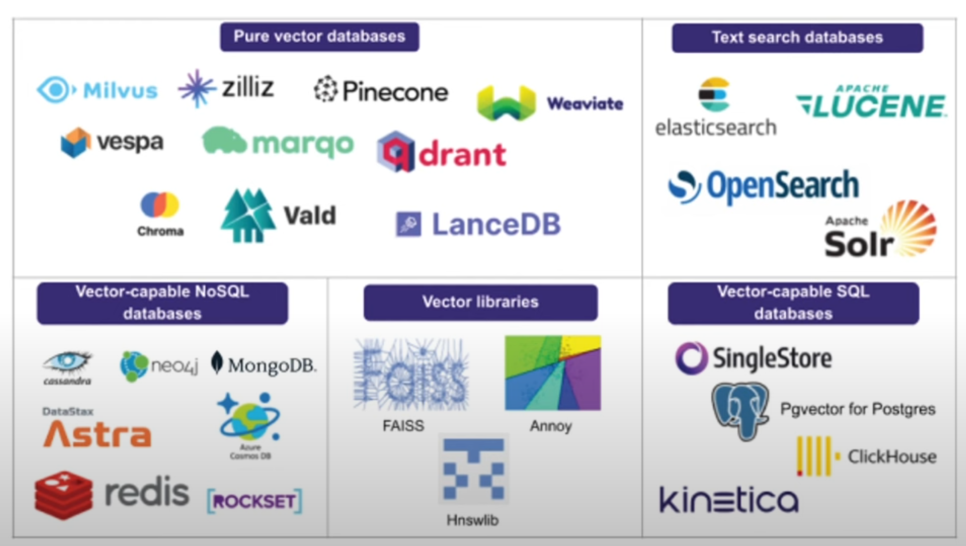

OpenAIEmbedding은 돈을 내라고 해서 짜증나므로 huggingface를 써봅니다.

In [10]:
!pip install -qU langchain-community sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 6.1 MB/s eta 0:00:00


In [14]:
from langchain_community.embeddings import (
    HuggingFaceEmbeddings,
)
from google.colab import userdata

embeddings = HuggingFaceEmbeddings()  # HuggingFace 임베딩을 생성합니다.

text = (
    "임베딩 테스트를 하기 위한 샘플 문장입니다."
)

# 텍스트를 임베딩하여 쿼리 결과를 생성
query_result = embeddings.embed_query(text)

# 쿼리 결과의 처음 5개 항목을 선택
display(query_result[:5])

# 텍스트를 임베딩하여 문서 벡터를 생성
doc_result = embeddings.embed_documents(
    [text]
)

# 문서 결과의 첫번째 요소에서 처음 5개 항목을 선택
display(doc_result[0][:5])

[0.032299283891916275,
 -0.10691162943840027,
 -0.021215565502643585,
 -0.0021571977995336056,
 0.013127222657203674]

[0.032299283891916275,
 -0.10691162943840027,
 -0.021215565502643585,
 -0.0021571977995336056,
 0.013127222657203674]

HuggingFaceInferenceAPIEmbeddings를 쓰면 sentence_transformers를 설치하거나 모델 다운로드가 필요없음

In [15]:
from langchain_community.embeddings import HuggingFaceInferenceAPIEmbeddings
from google.colab import userdata

embeddings = HuggingFaceInferenceAPIEmbeddings(
    # Hugging Face Inference API 키를 설정합니다.
    api_key=userdata.get('HUGGING_FACE_KEY'),
    # 사용할 임베딩 모델의 이름을 지정합니다.
    model_name="sentence-transformers/all-MiniLM-l6-v2",
)

# 주어진 텍스트에 대한 쿼리 임베딩을 생성합니다.
query_result = embeddings.embed_query(text)
# 쿼리 임베딩 결과의 첫 3개 요소를 가져옵니다.
query_result[:3]

[-0.013430356979370117, 0.0677628219127655, 0.013700650073587894]

huggingface_hub 패키지로 임베딩을 처리할 수도 있음.

In [16]:
!pip install -qU langchain_community huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.7/401.7 kB 2.3 MB/s eta 0:00:00


In [17]:
from langchain_community.embeddings import HuggingFaceHubEmbeddings

embeddings = HuggingFaceHubEmbeddings()
text = (
    "임베딩 테스트를 하기 위한 샘플 문장입니다."  # 테스트용 문서 텍스트를 정의합니다.
)

# 텍스트를 임베딩하여 쿼리 결과를 생성합니다.
query_result = embeddings.embed_query(text)

# 차원을 확인합니다.
len(query_result)

# 쿼리 결과의 처음 3개 항목을 선택합니다.
query_result[:3]

HfHubHTTPError: 429 Client Error: Too Many Requests for url: https://api-inference.huggingface.co/pipeline/feature-extraction/sentence-transformers/all-mpnet-base-v2 (Request ID: peC6lbZ0N_y52KjTmO1on)

Rate limit reached. Please log in or use a HF access token

# CH10 벡터저장소

## 벡터저장소

벡터 스토어를 사용할 때에는 벡터 스토어에 넣을 벡터를 만들어서 넣어야 하는데 일반적으로 임베딩을 통해서 만들어짐.

### Chroma

개발자 생산성에 초점을 맞춘 오픈소스 벡터 데이터베이스임.


설치해봅시다.

In [29]:
!pip install -qU langchain_community chromadb pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 1.9 MB/s eta 0:00:00


#### 기본 사용법

In [55]:
# import
from langchain_community.embeddings.sentence_transformer import (
    SentenceTransformerEmbeddings,
)
from langchain_community.vectorstores import Chroma
from langchain_text_splitters import CharacterTextSplitter

from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("./sample_data/CAPE_삼성전자_20200918.pdf")

# 로더를 사용하여 데이터를 불러옵니다.
documents = loader.load()

#display(documents)

# 문서를 청크로 분할합니다.
text_splitter = CharacterTextSplitter()
docs = text_splitter.split_documents(documents)

# display(docs)

# 오픈 소스 임베딩 함수를 생성합니다.
stf_embeddings = HuggingFaceEmbeddings(
    model_name='jhgan/ko-sroberta-nli',
    model_kwargs={'device':'cpu'},
    encode_kwargs={'normalize_embeddings':True},
)

# Chroma에 로드합니다.
db = Chroma.from_documents(docs, stf_embeddings)

# 질의합니다.
query = "삼성전자 "
result = db.similarity_search(query)

# 결과를 출력합니다.
display("=================================")
display(result)

db.delete_collection()

'================================='

[Document(page_content='CAPE Research  Division  ▶▶▶  Company Analysis  _ 2020/09/1 8 \n \nAnalyst 박성순ㆍ02)6923 -7333ㆍsspark@capefn.com  \n \n삼성전자  (005930KS | Buy 유지 | TP 80,000 원 상향) \n우주의  기운이  삼성전자로  \n \n삼성전자에  대해 투자의견  Buy를 유지하며  목표주가를  80,000원으로  상향합니다 . 3분기 스마트폰과 TV 등 Set 중심의  강한 \nPent -up 수요가  발생하고  있습니다 . 이에 더해 최근 Huawei향 단기 수요 증가와  메모리  수율 개선으로  가격 하락폭  대비 견조\n한 반도체  실적이  예상됩니다 .  Foundry 사업의  향후 성장 기대감도  Valuation 확대 요소로  판단합니다 . \n \n3Q20F 매출액  64.2조원(+21.2 % QoQ), 영업이익  11.0조원(+35.2 % QoQ) 예상 \n\uf09f 삼성전자  3분기 실적은  시장 기대치를  상회할  것으로  전망. Set 중심으로  강한 Pent-Up 수요가  발생 중. 특히 스마\n트폰 출하량은  당초 기대치를 크게 상회하는  8,000만대로  예상. 플래그십  출시 효과와  중가 모델 비중 증가로  +10% \nQoQ의 ASP 상승 기대. 이에 더해 온라인  판매 확대, 마케팅  비용 절감에  따른 수익성  개선이  예상됨 . \n\uf09f DP는 LCD TV 패널 가격 상승에  따른 적자 축소와  북미 고객사  OLED 공급으로  전분기  대비 수익성  개선이  기대. \n다만 북미 고객사의  신모델  출시 지연 영향으로  당초 추정치는  하회할  전망. 이는 4분기로  이연하여  추정치에  반영. \n \nHuawei로 인한 메모리  공백 우려는  크지 않아 \n\uf09f Huawei는 9월 15일 제재 전까지  공격적인  메모리  Rush Order 가 발생하였음 . 이는 모바

#### Faiss

Facebook AI Similarity Search(Faiss)는 밀집 벡터의 효율적인 유사도 검색과 클러스터링을 위한 라이브러리임

Faiss는 RAM에 맞지 않을 수 있는 벡터 집합을 포함하여 모든 크기의 벡터 집합을 검색하는 알고리즘을 포함하고 있고 평가와 매개변수 튜닝을 위한 지원 코드도 포함되어 있음

chromadb와 거의 동일하게 사용한다.

chromadb는 vector database이고 faiss는 vector library이다.

chromadb는 db가 제공하는 기능들이 있는 것 같고, faiss는 유사도 계산에 특화되어 있는 것으로 보임.



In [47]:
!pip install -qU langchain-community faiss-cpu sentence-transformers tiktoken

In [52]:
from langchain_community.document_loaders import TextLoader
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.embeddings import (
    HuggingFaceEmbeddings,
)
from google.colab import userdata

embeddings = HuggingFaceEmbeddings(
    model_name='jhgan/ko-sroberta-nli',
    model_kwargs={'device':'cpu'},
    encode_kwargs={'normalize_embeddings':True},
)

# FAISS에서 AVX2 최적화를 사용하지 않으려면 다음 줄의 주석을 해제하세요.
# import os
#
# os.environ['FAISS_NO_AVX2'] = '1'

# TextLoader를 사용하여 텍스트 파일을 로드합니다.
loader = TextLoader("./sample_data/appendix-keywords.txt")

# 로드된 문서를 가져옵니다.
documents = loader.load()

# CharacterTextSplitter를 사용하여 문서를 분할합니다.
text_splitter = CharacterTextSplitter(chunk_size=300, chunk_overlap=0)

# 분할된 문서를 가져옵니다.
docs = text_splitter.split_documents(documents)

# FAISS를 사용하여 문서와 임베딩으로부터 데이터베이스를 생성합니다.
db = FAISS.from_documents(docs, embeddings)

# 쿼리(query) 변수에 저장된 질문과 유사한 문서를 데이터베이스에서 검색합니다.
query = "임베딩(Embedding)이란 무엇인가요?"
docs = db.similarity_search(query)  # 질문과 유사한 문서를 데이터베이스에서 검색

# docs 리스트의 첫 번째 요소의 page_content 속성을 출력합니다.
print(docs[0].page_content)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.49k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/744 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/585 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/495k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

정의: 임베딩은 단어나 문장 같은 텍스트 데이터를 저차원의 연속적인 벡터로 변환하는 과정입니다. 이를 통해 컴퓨터가 텍스트를 이해하고 처리할 수 있게 합니다.
예시: "사과"라는 단어를 [0.65, -0.23, 0.17]과 같은 벡터로 표현합니다.
연관키워드: 자연어 처리, 벡터화, 딥러닝

Token


# CH12 Retrieval Augmented Generation(RAG)

# 새 섹션

## 01 기본내용 - 네이버 뉴스기사 QA 봇

Langchain으로 간단한 Q&A 애플리케이션을 구축한다.

질문 처리

질문 받아서 처리하고, 관련 데이터 찾기를 진행
* 데이터 소스 연결
* 데이터 인덱싱 및 검색

답변 생성
* 답변 생성 모델

LangSmith의 역할
* 성능 모니터링
* 오류 분석

아키텍쳐
* 인덱싱
  * 로드
  * 분할
  * 저장
* 검색 및 생성
  * 검색
  * 생성

In [64]:
!pip install -U langchain langchainhub langchain-community langchain-experimental langchain-core langchain-google-genai langsmith

In [73]:
import bs4
from langchain import hub
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_community.embeddings import (
    HuggingFaceEmbeddings,
)
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.callbacks.base import BaseCallbackHandler
from google.colab import userdata
import google.generativeai as genai

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

# 뉴스기사 내용을 로드하고, 청크로 나누고, 인덱싱합니다.
loader = WebBaseLoader(
    web_paths=("https://n.news.naver.com/article/437/0000378416",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            "div",
            attrs={"class": ["newsct_article _article_body",
                             "media_end_head_title"]},
        )
    ),
)

docs = loader.load()
print(f"문서의 수: {len(docs)}")
docs

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)

splits = text_splitter.split_documents(docs)
len(splits)

# 벡터스토어를 생성합니다
embeddings = HuggingFaceEmbeddings(
    model_name='jhgan/ko-sroberta-nli',
    model_kwargs={'device':'cpu'},
    encode_kwargs={'normalize_embeddings':True},
)

vectorstore = FAISS.from_documents(documents=splits, embedding=embeddings)

# 뉴스에 포함되어 있는 정보를 검색하고 생성합니다.
retriever = vectorstore.as_retriever()

prompt = hub.pull("rlm/rag-prompt")
prompt

# print(prompt.messages[0].prompt.template)

llm = ChatGoogleGenerativeAI(
    model="gemini-pro",
    google_api_key=GOOGLE_API_KEY,
    temperature=0, #창의성
    max_output_tokens=2048,
)

def format_docs(docs):
    # 검색한 문서 결과를 하나의 문단으로 합쳐줍니다.
    return "\n\n".join(doc.page_content for doc in docs)


# 체인을 생성합니다.
rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

print(
    rag_chain.invoke("정부의 저출생 대책을 bullet points 형식으로 작성해 주세요.")
)  # 문서에 대한 질의를 입력하고, 답변을 출력합니다.

# 컬렉션을 삭제합니다.
vectorstore.delete_collection()


문서의 수: 1


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


제공된 텍스트에는 정부의 저출생 대책에 대한 정보가 없습니다. 따라서 저는 정부의 저출생 대책을 bullet points 형식으로 작성할 수 없습니다.


AttributeError: 'FAISS' object has no attribute 'delete_collection'

## 03 RAPTOR: 긴 문맥 요약

LangChain의 LCEL 문서에 RAPTOR라는 논문의 내용을 적용한다.

In [74]:
!pip install -U langchain langchainhub langchain-community langchain-experimental langchain-core langchain-google-genai langsmith

1


3

Num tokens in all context: 5175


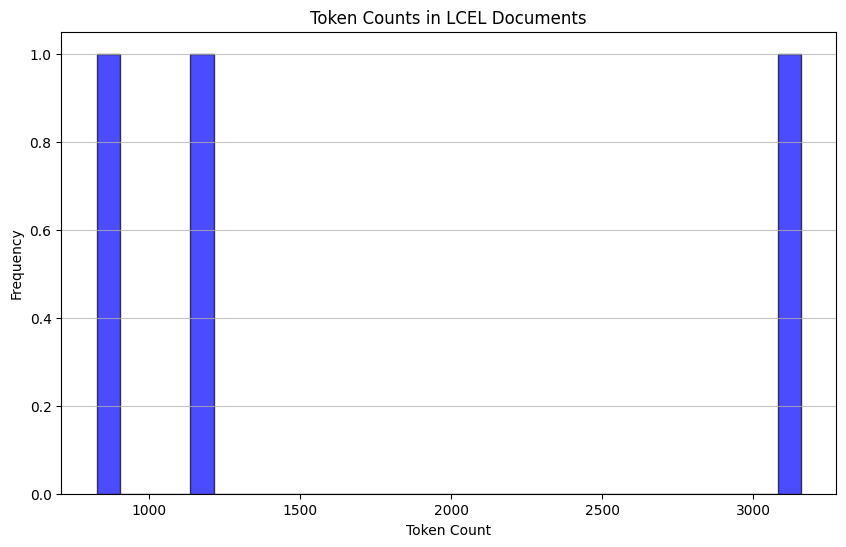

In [91]:
from langchain_community.document_loaders.recursive_url_loader import RecursiveUrlLoader
from bs4 import BeautifulSoup as Soup
import tiktoken
import matplotlib.pyplot as plt


def num_tokens_from_string(string: str, encoding_name: str) -> int:
    # 주어진 문자열에서 토큰의 개수를 반환합니다.
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens


# LCEL 문서 로드
url = "https://python.langchain.com/docs/expression_language/"
loader = RecursiveUrlLoader(
    url=url,
    max_depth=20,
    extractor=lambda x: Soup(x, "html.parser").text
)
docs = loader.load()
print(len(docs))

# PydanticOutputParser를 사용한 LCEL 문서 로드 (기본 LCEL 문서 외부)
url = "https://python.langchain.com/docs/modules/model_io/output_parsers/quick_start"
loader = RecursiveUrlLoader(
    url=url,
    max_depth=1,
    extractor=lambda x: Soup(x, "html.parser").text
)
docs_pydantic = loader.load()

# Self Query를 사용한 LCEL 문서 로드 (기본 LCEL 문서 외부)
url = "https://python.langchain.com/docs/modules/data_connection/retrievers/self_query/"
loader = RecursiveUrlLoader(
    url=url,
    max_depth=1,
    extractor=lambda x: Soup(x, "html.parser").text
)
docs_sq = loader.load()

# 문서 텍스트
docs.extend([*docs_pydantic, *docs_sq])
docs_texts = [d.page_content for d in docs]

# 각 문서에 대한 토큰 수 계산
counts = [num_tokens_from_string(d, "cl100k_base") for d in docs_texts]
display(len(docs))

# 토큰 수의 히스토그램을 그립니다.
plt.figure(figsize=(10, 6))
plt.hist(counts, bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title("Token Counts in LCEL Documents")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.grid(axis="y", alpha=0.75)

# 히스토그램을 표시합니다.
plt.show

# 문서 텍스트를 연결합니다.
# 문서를 출처 메타데이터 기준으로 정렬합니다.
d_sorted = sorted(docs, key=lambda x: x.metadata["source"])
d_reversed = list(reversed(d_sorted))  # 정렬된 문서를 역순으로 배열합니다.
concatenated_content = "\n\n\n --- \n\n\n".join(
    [
        # 역순으로 배열된 문서의 내용을 연결합니다.
        doc.page_content
        for doc in d_reversed
    ]
)
print(
    "Num tokens in all context: %s"  # 모든 문맥에서의 토큰 수를 출력합니다.
    % num_tokens_from_string(concatenated_content, "cl100k_base")
)